<a href="https://colab.research.google.com/github/Dhiooonn/Analisis-System-Rekomendasi-Musik-Spotify-MenggunakanMachineLearning/blob/main/Analisis_System_Rekomendasi_Musik_Menggunakan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyek ini berfokus pada **analisis musik Spotify menggunakan pendekatan machine learning** untuk mengklasifikasikan musik berdasarkan suasana hati, dengan mempertimbangkan lirik lagu dan berbagai faktor lainnya. Tujuan utama dari proyek ini adalah membangun sistem rekomendasi musik bagi pengguna yang ingin mendengarkan playlist yang disesuaikan. Sistem semacam ini tidak hanya dapat membantu memperbaiki suasana hati seseorang, tetapi juga dapat menyebarkan suasana positif di antara orang-orang.

Data yang digunakan dalam proyek ini diambil dari Kaggle, yang merupakan platform penyimpanan dan berbagi dataset. Proyek ini memanfaatkan dataset yang tersedia untuk menganalisis musik dan membangun sistem rekomendasi.

Pengimporan Pustaka yang Diperlukan
Pustaka yang diimpor dalam proyek ini meliputi:
1. NumPy: Menyediakan dukungan untuk array multi-dimensi dan fungsi matematika tingkat tinggi.
2. Pandas: Digunakan untuk manipulasi dan analisis data.
3. Matplotlib: Membantu dalam menghasilkan grafik berkualitas publikasi.
4. Scikit-learn: Menyediakan berbagai algoritma klasifikasi.
Seaborn: Menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik.

Setelah memuat dan membersihkan dataset dengan menghapus kolom yang tidak diperlukan, analisis lebih lanjut dilakukan pada data tersebut.

In [61]:
import numpy as np # linear algebra
import pandas as pd
from google.colab import drive # memuat data melalui google drive
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz



In [62]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [64]:
# Path file dataset
file_path = '/content/drive/MyDrive/Machine Learning/Analisis system rekomendasi spotify menggunakan machine learning/dataset/spotify_top_songs_audio_features.csv'

In [66]:
spotify_df = pd.read_csv(file_path)
spotify_df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


## Data Cleaning and Preparation

In [67]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [68]:
spotify_df.shape

(6513, 19)

In [69]:
spotify_df['id'].duplicated().sum()

np.int64(0)

In [70]:
spotify_df.isnull().sum()

,0
id,0
artist_names,0
track_name,0
source,0
key,0
mode,0
time_signature,0
danceability,0
energy,0
speechiness,0


Ini menunjukkan bahwa tidak ada **nilai yang hilang** dalam dataset. Selain itu, tidak ada **data yang buruk** dalam dataframe tersebut.


#### Memeriksa apakah ada nilai yang melebihi batas yang ditentukan untuk kolom-kolom ini.


In [71]:
columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
query = " | ".join([f"({col} < 0) | ({col} > 1)" for col in columns])
spotify_df.query(query)


,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams


In [72]:
query_loudness = "(loudness < -60) | (loudness > 0)"
query_tempo = "( tempo < 50) | (tempo > 220)"
spotify_df = spotify_df.drop(spotify_df.query(query_loudness or query_tempo).index)

In [73]:
spotify_df.shape

(6509, 19)

In [74]:
# Pemetaan key ke angka
key_mapping = {
    'C': 0.0,
    'C#/Db': 1.0,
    'D': 2.0,
    'D#/Eb': 3.0,
    'E': 4.0,
    'F': 5.0,
    'F#/Gb': 6.0,
    'G': 7.0,
    'G#/Ab': 8.0,
    'A': 9.0,
    'A#/Bb': 10.0,
    'B': 11.0
}

# Mengubah kolom 'key' menjadi angka sesuai dengan key_mapping
spotify_df['key'] = spotify_df['key'].map(key_mapping)

# Memeriksa hasil perubahan
print(spotify_df['key'].value_counts())


key
1.0     942
0.0     705
7.0     595
11.0    567
8.0     553
5.0     531
9.0     523
2.0     523
6.0     501
10.0    465
4.0     424
3.0     180
Name: count, dtype: int64


In [75]:
spotify_df['mode'].value_counts()

,count
mode,
Major,3745
Minor,2764


In [76]:
col = spotify_df.pop('key')
spotify_df.insert(6, 'key', col)

# Menampilkan beberapa baris data
spotify_df.head()

,id,artist_names,track_name,source,mode,time_signature,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,Major,4 beats,7.0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,Minor,4 beats,1.0,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,Major,4 beats,1.0,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,Major,4 beats,9.0,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,Major,4 beats,1.0,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


#### Mengubah kolom time signature menjadi angka, tidak ada kata 'beats'

In [77]:
# Remove the word "beats" from the 'time_signature' column
spotify_df['time_signature'] = spotify_df['time_signature'].str.replace(' beats', '', regex=False)

# Convert the column to numeric (if needed, in case there are any non-numeric values)
spotify_df['time_signature'] = pd.to_numeric(spotify_df['time_signature'], errors='coerce')

In [78]:
spotify_df['time_signature'].value_counts()

,count
time_signature,
4,6053
3,324
5,107
1,25


#### Menambahkan kolom dengan duration dan mengubah dalam bentuk menit serta menghapus kolom duration_ms.


In [79]:
# Mengubah durasi dari milidetik ke menit
spotify_df['duration'] = spotify_df['duration_ms'] / 60000  # 1 menit = 60000 ms

# Menghapus kolom 'duration_ms' jika tidak diperlukan lagi
spotify_df = spotify_df.drop('duration_ms', axis=1)

spotify_df.head()

,id,artist_names,track_name,source,mode,time_signature,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,weeks_on_chart,streams,duration
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,Major,4,7.0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,17,107527761,3.141517
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,Minor,4,1.0,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,2,9944865,3.228000
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,Major,4,1.0,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,125,512388123,3.716217
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,Major,4,9.0,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,2,11985346,4.747600
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,Major,4,1.0,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,30,301860377,3.225117


In [80]:
col = spotify_df.pop('duration')
spotify_df.insert(3, 'duration', col)

# Menampilkan beberapa baris data
spotify_df.head()

,id,artist_names,track_name,duration,source,mode,time_signature,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),3.141517,RCA Records Label,Major,4,7.0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,3.228000,Def Jam Recordings,Minor,4,1.0,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,3.716217,Island Records,Major,4,1.0,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),4.747600,Atlantic/KSR,Major,4,9.0,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),3.225117,Republic Records,Major,4,1.0,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,30,301860377


#Menghapus kolom yang tidak diperlukan

In [81]:
# Menghapus kolom 'weeks_on_chart' dan 'streams' dari DataFrame
spotify_df = spotify_df.drop(['weeks_on_chart', 'streams', 'id'], axis=1)

# Menampilkan beberapa baris pertama untuk memastikan kolom sudah dihapus
spotify_df.head()


,artist_names,track_name,duration,source,mode,time_signature,key,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo
0,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),3.141517,RCA Records Label,Major,4,7.0,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963
1,Alessia Cara,Growing Pains,3.228000,Def Jam Recordings,Minor,4,1.0,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153
2,The Killers,Mr. Brightside,3.716217,Island Records,Major,4,1.0,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033
3,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),4.747600,Atlantic/KSR,Major,4,9.0,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911
4,"Post Malone, The Weeknd",One Right Now (with The Weeknd),3.225117,Republic Records,Major,4,1.0,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014


# menambahkan kolom target

In [82]:
# Contoh: Membuat kolom target berdasarkan energy
spotify_df['target'] = spotify_df['energy'].apply(lambda x: 1 if x > 0.6 else 0)


In [83]:
# Contoh: Menggunakan kombinasi danceability dan loudness
spotify_df['target'] = spotify_df.apply(
    lambda x: 1 if x['danceability'] > 0.7 and x['loudness'] > -10 else 0, axis=1
)

In [84]:
from sklearn.cluster import KMeans

# Pilih kolom numerik
numeric_features = spotify_df[['danceability', 'energy', 'tempo']]  # Sesuaikan dengan fitur yang tersedia

# Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Terapkan K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
spotify_df['target'] = kmeans.fit_predict(scaled_features)


#Menyimpan hasil cleaning

In [85]:
# Path file dataset yang sudah di cleaning
file_path2 = '/content/drive/MyDrive/Machine Learning/Analisis system rekomendasi spotify menggunakan machine learning/dataset/cleaned_spotify_top_songs.csv'

# EDA

In [86]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
file_path2 = '/content/drive/MyDrive/Machine Learning/Analisis system rekomendasi spotify menggunakan machine learning/dataset/cleaned_spotify_top_songs.csv'

In [88]:
spotify_df = pd.read_csv(file_path)
spotify_df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [89]:
spotify_df.columns

Index(['id', 'artist_names', 'track_name', 'source', 'key', 'mode',
       'time_signature', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness',
       'tempo', 'duration_ms', 'weeks_on_chart', 'streams'],
      dtype='object')

###PLOTTING RATA-RATA NILAI SEMUA FITUR AUDIO
Saya menghitung rata-rata dari setiap fitur audio dalam dataset untuk menganalisis kontribusinya terhadap kesukaan lagu.
**Nilai Rata-Rata dan Plot Jarak untuk Fitur Danceability**
Selanjutnya, saya akan membuat plot untuk menunjukkan nilai rata-rata dan distribusi fitur danceability guna mengevaluasi dampaknya terhadap kesukaan lagu.

Mean value for danceability: 0.6817306924612314


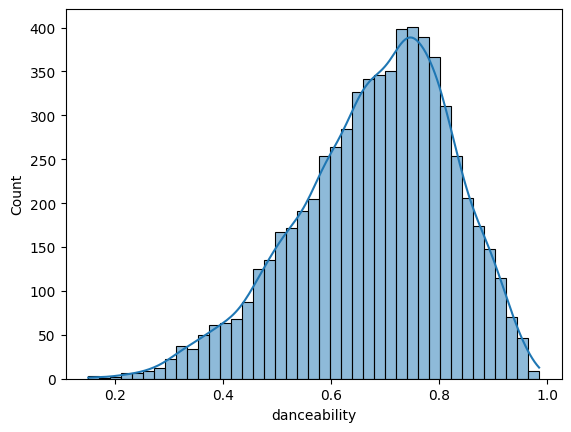

In [90]:
print("Mean value for danceability:", spotify_df['danceability'].mean())

sns.histplot(spotify_df['danceability'], kde=True)
plt.show()


Dengan nilai rata-rata sebesar 0,681, jelas bahwa sebagian besar lagu teratas memiliki rating danceability yang tinggi.


###Nilai Rata-Rata dan Plot Jarak untuk Fitur ENERGY

Mean value for energy: 0.6365222785198832


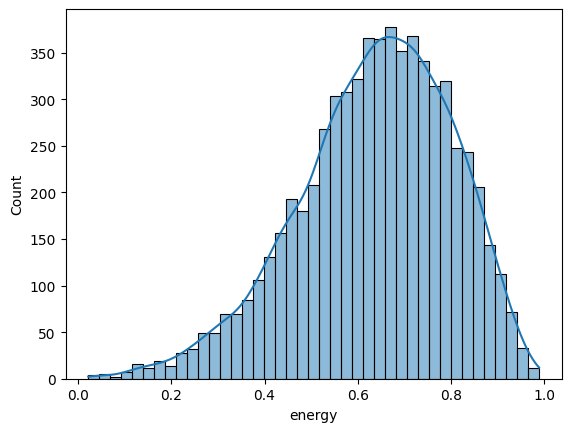

In [91]:
print("Mean value for energy:", spotify_df['energy'].mean())
sns.histplot(spotify_df['energy'], kde=True)
plt.show()

Sepertinya orang lebih suka lagu yang enerjik daripada yang tenang (rata-rata 0.636), meskipun fitur ini terlihat lebih merata distribusinya dibandingkan dengan danceability.

###Memetakan Nilai Numerik Kunci ke Not

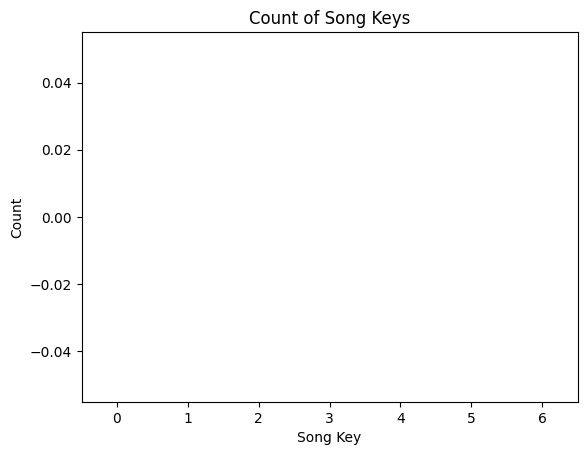

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pemetaan key ke nama kunci
key_mapping = {
    0.0: 'C',
    1.0: 'C♯,D♭',
    2.0: 'D',
    3.0: 'D♯,E♭',
    4.0: 'E',
    5.0: 'F',
    6.0: 'F♯,G♭',
    7.0: 'G',
    8.0: 'G♯,A♭',
    9.0: 'A',
    10.0: 'A♯,B♭',
    11.0: 'B'
}

# Mengubah kolom 'key' menjadi nama kunci sesuai dengan key_mapping
spotify_df['key'] = spotify_df['key'].map(key_mapping)

# Visualisasi count plot untuk kolom 'key'
sns.countplot(x='key', data=spotify_df, order=spotify_df['key'].value_counts().index)

# Menambahkan judul dan label
plt.title("Count of Song Keys")
plt.xlabel('Song Key')
plt.ylabel('Count')

# Menampilkan plot
plt.show()


Kunci yang paling umum di antara lagu-lagu teratas adalah C♯/D♭.

### Nilai Rata-Rata dan Plot Jarak untuk Fitur LOUDNESS


Mean value for loudness: -6.350666513127591


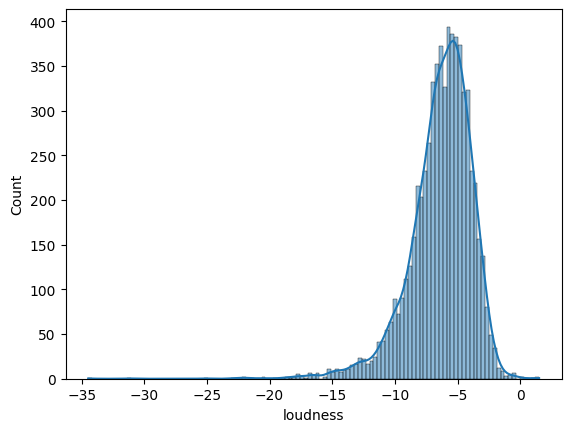

In [93]:
print("Mean value for loudness:", spotify_df['loudness'].mean())
sns.histplot(spotify_df['loudness'], kde=True)  # Menggunakan histplot dan menambahkan KDE
plt.show()

Karena nilainya negatif, ini menunjukkan bahwa orang cenderung menyukai lagu-lagu yang tidak terlalu keras.

###Nilai Rata-Rata dan Plot Jarak untuk Fitur SPEECHINES

Mean value for speechiness: 0.12193311837862736


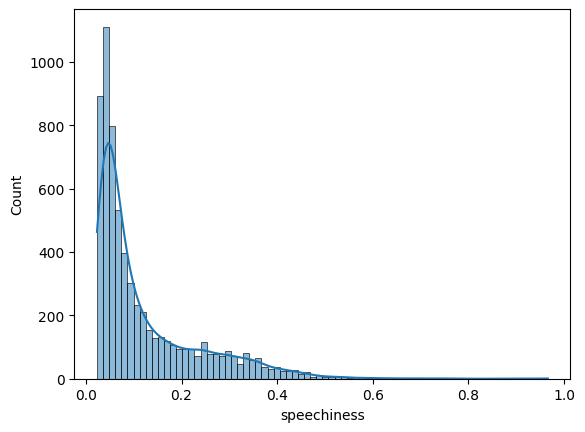

In [94]:
print("Mean value for speechiness:", spotify_df['speechiness'].mean())
sns.histplot(spotify_df['speechiness'], kde=True)  # Menggunakan histplot dan menambahkan KDE
plt.show()

Nilai rata-rata untuk fitur speechiness adalah rendah, yaitu hanya 0,121, yang menyimpulkan bahwa orang lebih suka lagu-lagu yang memiliki lebih banyak musik di dalamnya.

###Nilai Rata-Rata dan Plot Jarak untuk Fitur ACOUSTICNESS

Mean value for acousticness: 0.23676098454322128


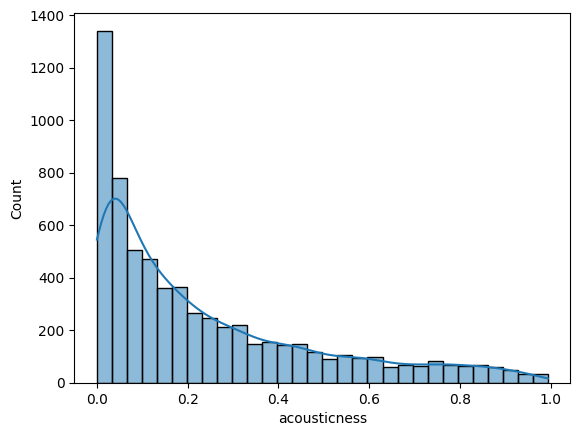

In [95]:
print("Mean value for acousticness:", spotify_df['acousticness'].mean())
sns.histplot(spotify_df['acousticness'], kde=True)  # Menggunakan histplot dan menambahkan KDE
plt.show()


Orang lebih suka lagu non-akustik daripada lagu akustik.

###Nilai Rata-Rata dan Plot Jarak untuk Fitur INSTRUMENTALNESS

In [ ]:
print("Mean value for instrumentalness:", spotify_df['instrumentalness'].mean())
sns.histplot(spotify_df['instrumentalness'], kde=True)  # Menggunakan histplot dan menambahkan KDE
plt.show()


Mean value for instrumentalness: 0.012468691260555812


Orang cenderung tidak menyukai lagu yang memiliki terlalu banyak instrumen.

###Nilai Rata-Rata dan Plot Jarak untuk Fitur LIVENESS

In [ ]:
print("Mean value for liveness:", spotify_df['liveness'].mean())
sns.histplot(spotify_df['liveness'], kde=True)  # Menggunakan histplot dan menambahkan KDE
plt.show()


###Nilai Rata-Rata dan Plot Jarak untuk Fitur TEMPO

In [ ]:
print('Mean value for tempo feature:', spotify_df['tempo'].mean())
sns.histplot(spotify_df['tempo'], kde=True)
plt.show()

Dari nilai rata-rata, terbukti bahwa orang cenderung lebih menyukai lagu-lagu dengan tempo cepat dibandingkan yang lambat.

###Nilai Rata-Rata dan Plot Jarak untuk Fitur DURATION

In [ ]:
# Menghitung rata-rata durasi dalam menit
print('Mean value for duration feature:', spotify_df['duration'].mean())

# Menampilkan histogram untuk kolom 'duration' dalam menit
sns.histplot(spotify_df['duration'], kde=True)
plt.show()


Orang cenderung menyukai lagu-lagu yang bukan terlalu panjang dan bukan terlalu pendek.


###Nilai Rata-Rata dan Plot Jarak untuk Fitur TIME_SIGNATURE

In [ ]:
print('Mean value for time_signature feature:', spotify_df['time_signature'].mean())
sns.distplot(spotify_df['time_signature'])
plt.show()

Orang cenderung mendengarkan lagu yang memiliki tanda waktu 4/5.

##Saya membangun heatmap ini untuk melihat fitur audio mana yang memiliki korelasi tinggi satu sama lain dan berkontribusi terhadap kesukaan lagu.

**CMAP**: Pemetaan dari nilai data ke ruang warna. Jika tidak disediakan, defaultnya akan bergantung pada apakah pusat ditetapkan.
**ANNOT**: Jika True, tulis nilai data di setiap sel. Jika berupa array yang memiliki bentuk yang sama dengan data, maka gunakan ini untuk memberi anotasi pada heatmap alih-alih data mentah.

In [ ]:
# Exclude non-numeric columns (e.g., artist_name, track_name) before calculating correlation
numeric_columns = spotify_df.select_dtypes(include=['number']).columns
spotify_df_numeric = spotify_df[numeric_columns]

# Plot the heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(spotify_df_numeric.corr(), cmap="coolwarm", annot=True)
plt.show()


***PAIRPLOT***

Saya membuat pairplot ini untuk menunjukkan hubungan antar fitur audio dan distribusi masing-masing fitur seperti loudness, acousticness, energy, dan instrumentalness. Fungsi ini akan membuat grid di mana setiap variabel dalam data akan ditampilkan di sumbu y pada satu baris dan di sumbu x pada satu kolom. Diagonal grid akan menampilkan plot distribusi untuk setiap variabel tersebut.

In [ ]:
sns.pairplot(spotify_df,vars= ['loudness','acousticness','energy','instrumentalness'])

**KORELASI MENGGUNAKAN REGRESI LINIER**

Untuk mengeksplorasi lebih jauh fitur audio, saya mencoba mencari korelasi antara beberapa fitur. Saya mencoba menemukan korelasi antara valence dan danceability dengan melatih model regresi linier dan memplot korelasinya dalam bentuk scatterplot.

In [ ]:
# Trying to find correlation between valence and danceability by training a linear regression model
x = spotify_df["danceability"].values
y = spotify_df["valence"].values

# Reshaping the dataset for x and y axes
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# Training the linear regression model on the dataset
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Plotting the correlation between danceability and song mood using the trained 'regr' model
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between Danceability and Song Mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Danceability")
plt.ylabel("Valence")

plt.show()

In [ ]:

# Menggunakan teknik korelasi untuk danceability dan energy
x = spotify_df["danceability"].values
y = spotify_df["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# Model regresi linear
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Membuat plot
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)

# Menghapus ticks
plt.xticks(())
plt.yticks(())

# Mengatur ticks minor dan major
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

# Menambahkan label sumbu
plt.xlabel("danceability")
plt.ylabel("energy")

# Menampilkan plot
plt.show()


In [ ]:
# Menggunakan teknik korelasi untuk danceability dan speechiness
x = spotify_df["danceability"].values
y = spotify_df["speechiness"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# Model regresi linear
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Membuat plot
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and speechiness")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)

# Menghapus ticks
plt.xticks(())
plt.yticks(())

# Mengatur ticks minor dan major
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

# Menambahkan label sumbu
plt.xlabel("danceability")
plt.ylabel("speechiness")

# Menampilkan plot
plt.show()

In [ ]:
# Menggunakan teknik korelasi untuk danceability dan speechiness
x = spotify_df["acousticness"].values.reshape(-1, 1)
y = spotify_df["energy"].values.reshape(-1, 1)

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between acousticness and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("acousticness")
plt.ylabel("energy")

plt.show()

##SPLITTING THE DATASET BY SENTIMENT
Splitting dataset into random train and test subsets with ratio of 70:30

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(spotify_df, test_size=0.30, random_state=42)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))


In [ ]:

# Pemisahan data berdasarkan target
pos_tempo = spotify_df[spotify_df['target'] == 1]['tempo']
neg_tempo = spotify_df[spotify_df['target'] == 0]['tempo']
pos_dance = spotify_df[spotify_df['target'] == 1]['danceability']
neg_dance = spotify_df[spotify_df['target'] == 0]['danceability']
pos_duration = spotify_df[spotify_df['target'] == 1]['duration']
neg_duration = spotify_df[spotify_df['target'] == 0]['duration']
pos_loudness = spotify_df[spotify_df['target'] == 1]['loudness']
neg_loudness = spotify_df[spotify_df['target'] == 0]['loudness']
pos_speechiness = spotify_df[spotify_df['target'] == 1]['speechiness']
neg_speechiness = spotify_df[spotify_df['target'] == 0]['speechiness']
pos_energy = spotify_df[spotify_df['target'] == 1]['energy']
neg_energy = spotify_df[spotify_df['target'] == 0]['energy']
pos_acousticness = spotify_df[spotify_df['target'] == 1]['acousticness']
neg_acousticness = spotify_df[spotify_df['target'] == 0]['acousticness']
pos_key = spotify_df[spotify_df['target'] == 1]['key']
neg_key = spotify_df[spotify_df['target'] == 0]['key']
pos_instrumentalness = spotify_df[spotify_df['target'] == 1]['instrumentalness']
neg_instrumentalness = spotify_df[spotify_df['target'] == 0]['instrumentalness']


PLOTTING HISTOGRAM SAMPLE DISTRIBUSI TEMPO LIKE/DISLIKE

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

Distribusi positif mengenai tempo menunjukkan bahwa orang cenderung mendengarkan lagu-lagu yang memiliki tempo sedang.

**PLOTTING DISTRIBUSI LIKE/DISLIKE UNTUK SETIAP FITUR AUDIO DALAM DIAGRAM YANG SAMA**

In [ ]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

- Danceability: Orang lebih suka lagu yang mudah untuk diajak menari karena distribusinya menunjukkan lebih banyak lagu dengan tingkat danceability yang tinggi.
- Song Duration: Orang lebih suka lagu yang durasinya tidak terlalu panjang maupun pendek.
- Loudness: Orang lebih suka lagu yang tidak terlalu keras.
- Speechiness: Orang lebih suka lagu dengan tingkat speechiness sedang (antara 0.2 hingga 0.4).
- Energy: Orang lebih suka lagu yang enerjik.
- Key: Orang lebih suka lagu yang ada di kunci D mayor.
- Acousticness: Orang lebih suka lagu yang tidak terlalu banyak unsur akustiknya.
- Instrumentalness: Orang lebih suka lagu yang tidak terlalu banyak instrumen musik tanpa vokal.

**Menemukan jumlah artis beserta lagu-lagu mereka**

In [ ]:
speaker_df = spotify_df.groupby('artist_names').count().reset_index()[['artist_names', 'track_name']]  # Ganti 'track_name' dengan kolom yang relevan
speaker_df.columns = ['artist_name', 'appearances']  # Ubah nama kolom agar lebih deskriptif

# Mengurutkan artis berdasarkan jumlah penampilan
speaker_df = speaker_df.sort_values('appearances', ascending=False)

# Menampilkan 10 artis teratas
speaker_df.head(10)

**Memplot grafik batang untuk penampilan yang sama**

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='artist_name', y='appearances', data=speaker_df.head(50))  # Gunakan 'artist_name'
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar terbaca
plt.title('Top 50 Artists by Appearances')
plt.xlabel('Artist Name')
plt.ylabel('Appearances')
plt.show()


#PELATIHAN ALGORITMA KLASIFIKASI PADA DATASET

## splitting

**MEMBAGI DATASET MENJADI DATA TRAIN DAN TEST**
Saya telah membagi data dengan perbandingan 80:20 karena data uji selalu lebih sedikit dibandingkan data latih. Selain itu, saya telah menghapus kolom 'TARGET' dari sumbu X dan memindahkannya ke sumbu Y, karena kolom tersebut adalah variabel yang bergantung (dependent variable) yang akan kita klasifikasikan dan prediksi berdasarkan nilainya.

In [ ]:
drive.mount('/content/drive')

In [ ]:
# Path file dataset yang sudah di cleaning
file_path2 = '/content/drive/MyDrive/Machine Learning/Analisis system rekomendasi spotify menggunakan machine learning/dataset/cleaned_spotify_top_songs.csv'

In [ ]:
spotify_df = pd.read_csv(file_path2)
spotify_df.head()

In [ ]:
spotify_df.columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# Menghapus kolom string yang tidak diperlukan: 'track_names', 'source', dan 'artist_names'
spotify_df.drop(['track_name', 'source', 'artist_names','mode'], axis=1, inplace=True)

# Memisahkan fitur (X) dan target (y)
X = spotify_df.drop(['target'], axis=1)
y = spotify_df['target']

# Membagi data menjadi training dan testing set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output ukuran dataset untuk memverifikasi
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

**MELATIH ALGORITMA KLASIFIKASI**  
Teknik klasifikasi digunakan untuk membangun model prediksi dari dataset. Beberapa teknik yang digunakan antara lain *decision tree*, *naive Bayes*, dan *random forest*. Masing-masing teknik ini menggunakan algoritma pembelajaran untuk memprediksi label kelas data yang belum diketahui.

**DECISION TREE CLASSIFIER**: Menggunakan pohon keputusan untuk memisahkan data berdasarkan atribut dan menetapkan label kelas (1 atau 0).

**GAUSSIAN NAIVE BAYES**: Algoritma cepat yang menggunakan teori probabilitas Bayes untuk memprediksi kelas data.

**RANDOM FOREST CLASSIFIER**: Membuat beberapa pohon keputusan dari subset acak data, kemudian menggabungkan hasilnya untuk menentukan kelas.

Semua algoritma ini diimpor dari pustaka *sklearn*, didefinisikan, dan digunakan untuk melatih model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

**MENCARI SKOR AKURASI UNTUK SETIAP ALGORITMA**

In [ ]:
tree_score = dtc.score(X_test, y_test)
naive_score = nbc.score(X_test, y_test)
random_forest_score = rfc.score(X_test, y_test)

print('Decision Tree score:', tree_score)
print('Naive Bayes score:', naive_score)
print('Random Forest score:', random_forest_score)

**DARI SKOR YANG DIDAPAT, RANDOM FOREST MERUPAKAN ALGORITMA YANG TERBAIK UNTUK MASALAH KLASIFIKASI INI.**

# plotting the roc curve

**Kurva ROC** adalah sebuah plot grafis yang menggambarkan kemampuan diagnostik dari sistem klasifikasi biner saat ambang diskriminasi (discrimination threshold) bervariasi.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
dtc_prob = dtc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
nbc_prob = nbc.predict_proba(X_test)[:, 1]
rfc_prob = rfc.predict_proba(X_test)[:, 1]

# Get the true class labels
actual = y_test

# Calculate ROC curve values for each model
dt_false_pos, dt_true_pos, _ = roc_curve(actual, dtc_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, nbc_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, rfc_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# Plot the ROC curves
plt.figure(figsize=(10,6))

# Plot for Decision Tree
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree = %0.2f' % dt_auc)

# Plot for Naive Bayes
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes = %0.2f' % nb_auc)

# Plot for Random Forest
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest = %0.2f' % rf_auc)

# Plot diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Show legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


Kesimpulan
- Random Forest menunjukkan performa yang baik untuk dataset pelatihan dengan akurasi 100%.

- Naive Bayes menunjukkan performa yang baik untuk dataset pengujian dengan akurasi 98%.

**Deep Learning pada Dataset**

Setelah mencoba algoritma tradisional, saya memutuskan untuk menggunakan algoritma deep learning sebagai algoritma klasifikasi untuk dataset ini.

**Apa itu Deep Learning dan Neural Networks?**
Neural networks adalah algoritma yang terinspirasi dari otak manusia, dirancang untuk mengenali pola. Mereka memproses data mentah, seperti gambar, suara, teks, atau data deret waktu, untuk mengelompokkan atau mengklasifikasikan berdasarkan pola numerik.

**Apa itu Artificial Neural Network (ANN)?**
ANN membantu kita memahami pengaruh perubahan ukuran dataset terhadap waktu komputasi dan situasi terbaik untuk model. Model ini bekerja dengan 3 lapisan: **input layer**, **hidden layer**, dan **output layer**.

**Langkah-langkah dalam Neural Network:**
1. Menetapkan bobot acak untuk semua hubungan.
2. Menghitung tingkat aktivasi untuk output nodes menggunakan input dan bobot.
3. Menemukan tingkat aktivasi output nodes.
4. Menghitung tingkat kesalahan pada output node.
5. Menggunakan bobot dan kesalahan untuk mengubah bobot antara hidden node dan input node.
6. Mengulang langkah-langkah di atas hingga konvergensi tercapai.
7. Menggunakan bobot akhir untuk menghitung output.

**Detail Statistika:**
Logit (H1) = W(I1H1) * I1 + W(I2H1) * I2 + W(I3H1) * I3 + Konstan

**Rekalibrasi Bobot:**
Error @ H1 = W(H1O1)Error@O1 + W(H1O2)Error@O2

**Kapan Model Cocok?**
ANN jarang digunakan untuk pemodelan prediktif karena cenderung overfit pada data.

**Keunggulan ANN:**
ANN lebih kuat karena memiliki banyak koefisien yang dapat dioptimalkan, sehingga lebih fleksibel dibandingkan model tradisional.

**Parameter Hyper:**
- Fungsi Aktivasi: 'RELU' (input layer), 'SIGMOID' (output layer)
- Optimizer: RMSPROP
- Fungsi Loss: Binary Cross-Entropy
- Epochs: 100
- Batch Size: 100

#ANN

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
drive.mount('/content/drive')

In [ ]:
dataset = '/content/drive/MyDrive/sem  5/DATA SAINS/cleaned_spotify_top_songs.csv'

In [ ]:
spotify_df = pd.read_csv(dataset)
spotify_df.head()

In [ ]:
import pandas as pd

# Memuat dataset
dataset = pd.read_csv('/content/drive/MyDrive/sem  5/DATA SAINS/cleaned_spotify_top_songs.csv')

# Memilih fitur (X) dan target (y) menggunakan nama kolom
X = dataset[['acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo']].values
y = dataset['target'].values

# Mengecek dimensi dari X dan y
print(X.shape, y.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**StandardScaler**: Proses pemusatan (centering) dan penskalaan (scaling) dilakukan secara terpisah pada setiap fitur dengan menghitung statistik yang relevan dari sampel di set pelatihan. Rata-rata dan deviasi standar kemudian disimpan untuk digunakan pada data berikutnya dengan metode transformasi.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
import keras
from keras.models import Sequential #to initialize ANN
from keras.layers import Dense      # to create layers in ANN model

In [ ]:
# Initializing ANN
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(7, activation='relu', input_shape=(6,), name='DenseLayer1'))  # Ubah 13 menjadi 6

# Adding 2nd hidden layer
classifier.add(Dense(7, activation='relu', name='DenseLayer2'))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid', name='DenseLayer3'))

# Compiling the ANN model
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs=100, batch_size=100)


**Mencoba Model ANN dengan Hyperparameter yang Berbeda**

Di sini, saya telah menggunakan hyperparameter berikut:

- Fungsi Aktivasi: 'TANH' (Lapisan Input), 'SIGMOID' (Lapisan Output)
- Optimizer: RMSPROP
- Fungsi Kerugian: BINARY_CROSSENTROPY
- Epochs: 100
- Batch Size: 100

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = '/content/drive/MyDrive/sem  5/DATA SAINS/cleaned_spotify_top_songs.csv'

In [ ]:
import pandas as pd

# Memuat dataset
dataset = pd.read_csv('/content/drive/MyDrive/sem  5/DATA SAINS/cleaned_spotify_top_songs.csv')

# Memilih fitur (X) dan target (y) menggunakan nama kolom
X = dataset[['acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo']].values
y = dataset['target'].values

# Mengecek dimensi dari X dan y
print(X.shape, y.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
import keras
from keras.models import Sequential #to initialize ANN
from keras.layers import Dense      # to create layers in ANN model
from keras import optimizers

In [ ]:
# Initializing ANN
from keras.models import Sequential
from keras.layers import Dense

# Defining ANN as a sequence of layers
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(7, activation='tanh', input_shape=(6,), name='DenseLayer1'))  # Ganti 13 dengan 6

# Adding the 2nd hidden layer
classifier.add(Dense(7, activation='tanh', name='DenseLayer2'))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid', name='DenseLayer3'))

# Compiling the ANN model
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs=100, batch_size=100)


Ini menunjukkan bahwa fungsi aktivasi tanh pada lapisan tersembunyi dan sigmoid pada lapisan output bekerja dengan baik, dengan akurasi sebesar 93%

**KESIMPULAN **
- Setelah melakukan EDA dan pelatihan menggunakan algoritma tradisional serta jaringan saraf tiruan, saya telah memahami konsep-konsep dengan baik.

- Saya telah mengimplementasikan semua yang mencakup materi untuk kursus ini.

- Untuk ANN, akurasi berubah dengan parameter yang berbeda, di mana ReLU bekerja lebih baik daripada tanh. Seiring dengan meningkatnya epoch, akurasi juga meningkat. Namun, semakin banyak lapisan yang digunakan, akan mengarah pada overfitting.

- Dalam algoritma klasifikasi, Random Forest bekerja dengan baik untuk dataset ini. Meskipun setiap algoritma memiliki fitur masing-masing, ia berfungsi sesuai dengan lingkungan dan masalah yang dihadapi.

- Dari analisis eksploratori, saya dapat menyimpulkan bahwa fitur seperti danceability dan energy lebih berpengaruh terhadap kesukaan seseorang terhadap lagu.